In [1]:
import pandas as pd

In [12]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [1]:
from csv import reader
from math import sqrt
from random import randrange

In [2]:
# Load a CSV file
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

In [1]:
import pandas as pd
# Load pima-indians-diabetes dataset
filename = 'diabetes.csv'
dataset = load_csv(filename)
print('Loaded data file {0} with {1} rows and {2} columns'.format(filename, len(dataset), len(dataset[0])))

# Exclude header row if present
header = dataset[0]
dataset = dataset[1:]


NameError: name 'load_csv' is not defined

In [6]:
import pandas as pd

# Load the dataset without header
filename = 'diabetes.csv'
df = pd.read_csv(filename, header=None)

# Assume the first row as the header if needed
header = df.iloc[0]
df = df[1:]

# Print the dataset information
print('Loaded data file {0} with {1} rows and {2} columns'.format(filename, df.shape[0], df.shape[1]))

# Print the columns of the dataset (excluding the first row which was header)
print(df.columns)


Loaded data file diabetes.csv with 768 rows and 9 columns
Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')


In [7]:
import pandas as pd

# Load the dataset
filename = 'diabetes.csv'
df = pd.read_csv(filename)

# Print the dataset information
print('Loaded data file {0} with {1} rows and {2} columns'.format(filename, df.shape[0], df.shape[1]))

# Convert all columns to float
df = df.astype(float)

# Print the first row after conversion to float
print("First row after conversion to float:")
print(df.iloc[0])


Loaded data file diabetes.csv with 768 rows and 9 columns
First row after conversion to float:
Pregnancies                   6.000
Glucose                     148.000
BloodPressure                72.000
SkinThickness                35.000
Insulin                       0.000
BMI                          33.600
DiabetesPedigreeFunction      0.627
Age                          50.000
Outcome                       1.000
Name: 0, dtype: float64


In [5]:
# Find the min and max values for each column
def dataset_minmax(dataset):
    minmax = list()
    for i in range(len(dataset[0])):
        col_values = [row[i] for row in dataset]
        value_min = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min, value_max])
    return minmax

# Calculate min and max for each column
minmax = dataset_minmax(dataset)
print("Min and max values for each column:", minmax)


Min and max values for each column: [[0.0, 17.0], [0.0, 199.0], [0.0, 122.0], [0.0, 99.0], [0.0, 846.0], [0.0, 67.1], [0.078, 2.42], [21.0, 81.0], [0.0, 1.0]]


In [11]:

def calculate_minmax(dataset):
    minmax = []
    for i in range(len(dataset[0])):
        col_values = [row[i] for row in dataset]
        col_min = min(col_values)
        col_max = max(col_values)
        minmax.append([col_min, col_max])
    return minmax

minmax = calculate_minmax(dataset)

# Step 3: Normalize the dataset
def normalize_dataset(dataset, minmax):
    for row in dataset:
        for i in range(len(row)):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

normalize_dataset(dataset, minmax)
print("First row after normalization:", dataset[0])


First row after normalization: [0.5, 0.0, 0.0]


In [10]:
# Calculate column standard deviations
def column_stdevs(dataset, means):
    stdevs = [0 for i in range(len(dataset[0]))]
    for i in range(len(dataset[0])):
        variance = [pow(row[i] - means[i], 2) for row in dataset]
        stdevs[i] = sum(variance)
    stdevs = [sqrt(x / (float(len(dataset) - 1))) for x in stdevs]
    return stdevs

# Calculate column standard deviations
stdevs = column_stdevs(dataset, means)
print("Column standard deviations:", stdevs)

Column standard deviations: [0.19821047427640412, 0.1606664230911368, 0.15865415713643263, 0.16113351078512764, 0.13622222500158176, 0.11749866349292767, 0.14147250000545467, 0.19600385901131143, 0.47695137724279896]


In [11]:
# Standardize dataset
def standardize_dataset(dataset, means, stdevs):
    for row in dataset:
        for i in range(len(row)):
            row[i] = (row[i] - means[i]) / stdevs[i]

# Standardize columns
standardize_dataset(dataset, means, stdevs)
print("First row after standardization:", dataset[0])

First row after standardization: [0.6395304921176561, 0.8477713205896719, 0.14954329852954315, 0.9066790623472527, -0.6924393247241301, 0.20387990726746852, 0.46818687022979616, 1.4250667195933595, 1.3650063669598014]


In [11]:
import pandas as pd
from random import randrange

# Load the dataset
filename = 'diabetes.csv'
df = pd.read_csv(filename)

def train_test_split(dataset, split=0.75):
    train = list()
    train_size = split * len(dataset)
    dataset_copy = list(dataset)
    while len(train) < train_size:
        index = randrange(len(dataset_copy))
        train.append(dataset_copy.pop(index))
    return train, dataset_copy

# Convert DataFrame to list of lists
dataset = df.values.tolist()

# Split into train and test sets
train, test = train_test_split(dataset, split=0.75)
print('Split {0} rows into train with {1} and test with {2}'.format(len(dataset), len(train), len(test)))


Split 768 rows into train with 576 and test with 192


In [13]:
# Split a dataset into k folds
def cross_validation_split(dataset, folds=3):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / folds)
    for i in range(folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

# Split dataset into k folds
folds = cross_validation_split(dataset, folds=3)
for i, fold in enumerate(folds):
    print('Fold {0} with {1} rows'.format(i, len(fold)))

Fold 0 with 256 rows
Fold 1 with 256 rows
Fold 2 with 256 rows


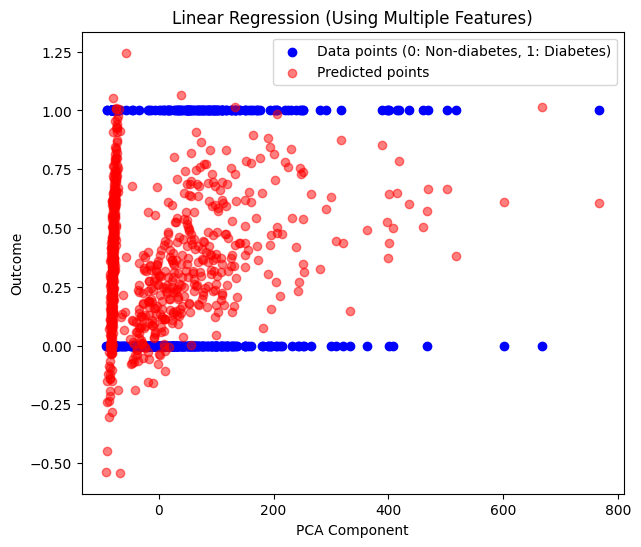

In [16]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

# Load the dataset
file_path = 'diabetes.csv'
data = pd.read_csv(file_path)

# Features and target variable
X = data.drop(columns=['Outcome'])
y = data['Outcome']

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred_linear = linear_model.predict(X)

# Reduce dimensions for visualization
pca = PCA(n_components=1)
X_reduced = pca.fit_transform(X)

# Plotting Linear Regression
plt.figure(figsize=(7, 6))
plt.scatter(X_reduced, y, color='blue', label='Data points (0: Non-diabetes, 1: Diabetes)')
plt.scatter(X_reduced, y_pred_linear, color='red', alpha=0.5, label='Predicted points')
plt.title('Linear Regression (Using Multiple Features)')
plt.xlabel('PCA Component')
plt.ylabel('Outcome')
plt.legend()
plt.show()


In [10]:
# Example 1: Create a DataFrame from scratch
df = pd.read_csv('diabetes.csv')

# Convert DataFrame to list of lists
dataset = df.values.tolist()

print(dataset)

[[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0, 1.0], [1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0, 0.0], [8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0, 1.0], [1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0, 0.0], [0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0, 1.0], [5.0, 116.0, 74.0, 0.0, 0.0, 25.6, 0.201, 30.0, 0.0], [3.0, 78.0, 50.0, 32.0, 88.0, 31.0, 0.248, 26.0, 1.0], [10.0, 115.0, 0.0, 0.0, 0.0, 35.3, 0.134, 29.0, 0.0], [2.0, 197.0, 70.0, 45.0, 543.0, 30.5, 0.158, 53.0, 1.0], [8.0, 125.0, 96.0, 0.0, 0.0, 0.0, 0.232, 54.0, 1.0], [4.0, 110.0, 92.0, 0.0, 0.0, 37.6, 0.191, 30.0, 0.0], [10.0, 168.0, 74.0, 0.0, 0.0, 38.0, 0.537, 34.0, 1.0], [10.0, 139.0, 80.0, 0.0, 0.0, 27.1, 1.441, 57.0, 0.0], [1.0, 189.0, 60.0, 23.0, 846.0, 30.1, 0.398, 59.0, 1.0], [5.0, 166.0, 72.0, 19.0, 175.0, 25.8, 0.587, 51.0, 1.0], [7.0, 100.0, 0.0, 0.0, 0.0, 30.0, 0.484, 32.0, 1.0], [0.0, 118.0, 84.0, 47.0, 230.0, 45.8, 0.551, 31.0, 1.0], [7.0, 107.0, 74.0, 0.0, 0.0, 29.6, 0.254, 31.0, 1.0], [1.0, 103

In [13]:
from random import seed
from random import randrange

def random_algorithm(train, test):
    output_values = [row[-1] for row in train]
    unique = list(set(output_values))
    predicted = list()
    for _ in test:
        index = randrange(len(unique))
        predicted.append(unique[index])
    return predicted


In [19]:
seed(1)
train = [[0], [1], [0], [1], [0], [1]]
test = [[None], [None], [None], [None]]

predictions = random_algorithm(train, test)
print(predictions)



[0, 0, 1, 0]
